# Exploratory Data Analysis of Boston Housing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')

## Read Data

In [2]:
data = pd.read_csv('train.csv')
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


## Describe and Info

crim - per capita crime rate by town.

zn - proportion of residential land zoned for lots over 25,000 sq.ft.

indus - proportion of non-retail business acres per town.

chas -- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox - nitrogen oxides concentration (parts per 10 million).

rm - average number of rooms per dwelling.

age - proportion of owner-occupied units built prior to 1940.

dis - weighted mean of distances to five Boston employment centres.

rad - index of accessibility to radial highways.

tax - full-value property-tax rate per $10,000.

ptratio - pupil-teacher ratio by town.

black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat - lower status of the population (percent).

medv - median value of owner-occupied homes in $1000s.

In [3]:
data.columns = ['ID','crime_rate','resi_land','non_retail_business','bound_river','nox','avg_rooms','old_house','office_dis','access_highway','tax','pt_ratio','black','lower_status','median_value']
data.describe()


,ID,crime_rate,resi_land,non_retail_business,bound_river,nox,avg_rooms,old_house,office_dis,access_highway,tax,pt_ratio,black,lower_status,median_value
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [4]:
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
ID,1.00000,2.00000,4.00000,5.00000,7.00000,11.00000,12.00000,13.00000,14.00000,15.00000
crime_rate,0.00632,0.02731,0.03237,0.06905,0.08829,0.22489,0.11747,0.09378,0.62976,0.63796
resi_land,18.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000,0.00000,0.00000
non_retail_business,2.31000,7.07000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000,8.14000,8.14000
bound_river,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
nox,0.53800,0.46900,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400,0.53800,0.53800
avg_rooms,6.57500,6.42100,6.99800,7.14700,6.01200,6.37700,6.00900,5.88900,5.94900,6.09600
old_house,65.20000,78.90000,45.80000,54.20000,66.60000,94.30000,82.90000,39.00000,61.80000,84.50000
office_dis,4.09000,4.96710,6.06220,6.06220,5.56050,6.34670,6.22670,5.45090,4.70750,4.46190
access_highway,1.00000,2.00000,3.00000,3.00000,5.00000,5.00000,5.00000,5.00000,4.00000,4.00000


In [5]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID                     333 non-null int64
crime_rate             333 non-null float64
resi_land              333 non-null float64
non_retail_business    333 non-null float64
bound_river            333 non-null int64
nox                    333 non-null float64
avg_rooms              333 non-null float64
old_house              333 non-null float64
office_dis             333 non-null float64
access_highway         333 non-null int64
tax                    333 non-null int64
pt_ratio               333 non-null float64
black                  333 non-null float64
lower_status           333 non-null float64
median_value           333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


Index(['ID', 'crime_rate', 'resi_land', 'non_retail_business', 'bound_river',
       'nox', 'avg_rooms', 'old_house', 'office_dis', 'access_highway', 'tax',
       'pt_ratio', 'black', 'lower_status', 'median_value'],
      dtype='object')

## Check for null values/ missing values

In [6]:
data.isnull().sum()

ID                     0
crime_rate             0
resi_land              0
non_retail_business    0
bound_river            0
nox                    0
avg_rooms              0
old_house              0
office_dis             0
access_highway         0
tax                    0
pt_ratio               0
black                  0
lower_status           0
median_value           0
dtype: int64

## Remove non-relevant columns

Columns like ID are not relevant to predict medv

In [7]:
df = data.drop('ID',axis=1)
df.head()

,crime_rate,resi_land,non_retail_business,bound_river,nox,avg_rooms,old_house,office_dis,access_highway,tax,pt_ratio,black,lower_status,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


## Divide data according to attribute type

In [8]:
bool_cols = ['bound_river']
boolean = df[bool_cols]

num_cols = ['crime_rate','resi_land','non_retail_business','nox','avg_rooms','old_house','office_dis','tax','pt_ratio','black','lower_status','median_value']
numeric = df[num_cols]

ord_cols = ['access_highway']
ordinal = df[ord_cols]

## Finding relations between features

### Heatmap

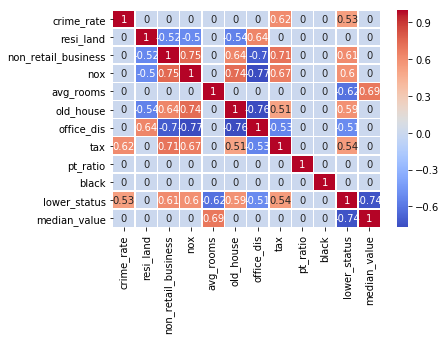

In [9]:
corr = numeric.corr()
thresh = 0.5
corr[abs(corr)<thresh] = 0 # view only those features with relevant correlation values.

sns.heatmap(corr,annot=True,linewidth = 0.5, cmap='coolwarm')
plt.show()

**Positive corr:**
- nox vs non retail business
- old house vs non retail business
- old house vs nox
- office_dist vs resi land
- tax vs crime
- tax vs non retail business
- tax vs nox
- lower status vs non retail business
- lower status vs nox
- median value vs avg rooms

**Negative Corr:**
- office dist vs non retail business
- office dist vs nox
- office dist vs old house
- lower status vs avg rooms
- median value vs lower status


### Scatter plots of numeric features with hue as non-numeric features

Hue : In a scatter plot, the hue is the column based on which the points of your plot are colored. This helps in deciding if any features help cluster these non-numeric features, or find relations between them. 


<Figure size 432x288 with 0 Axes>

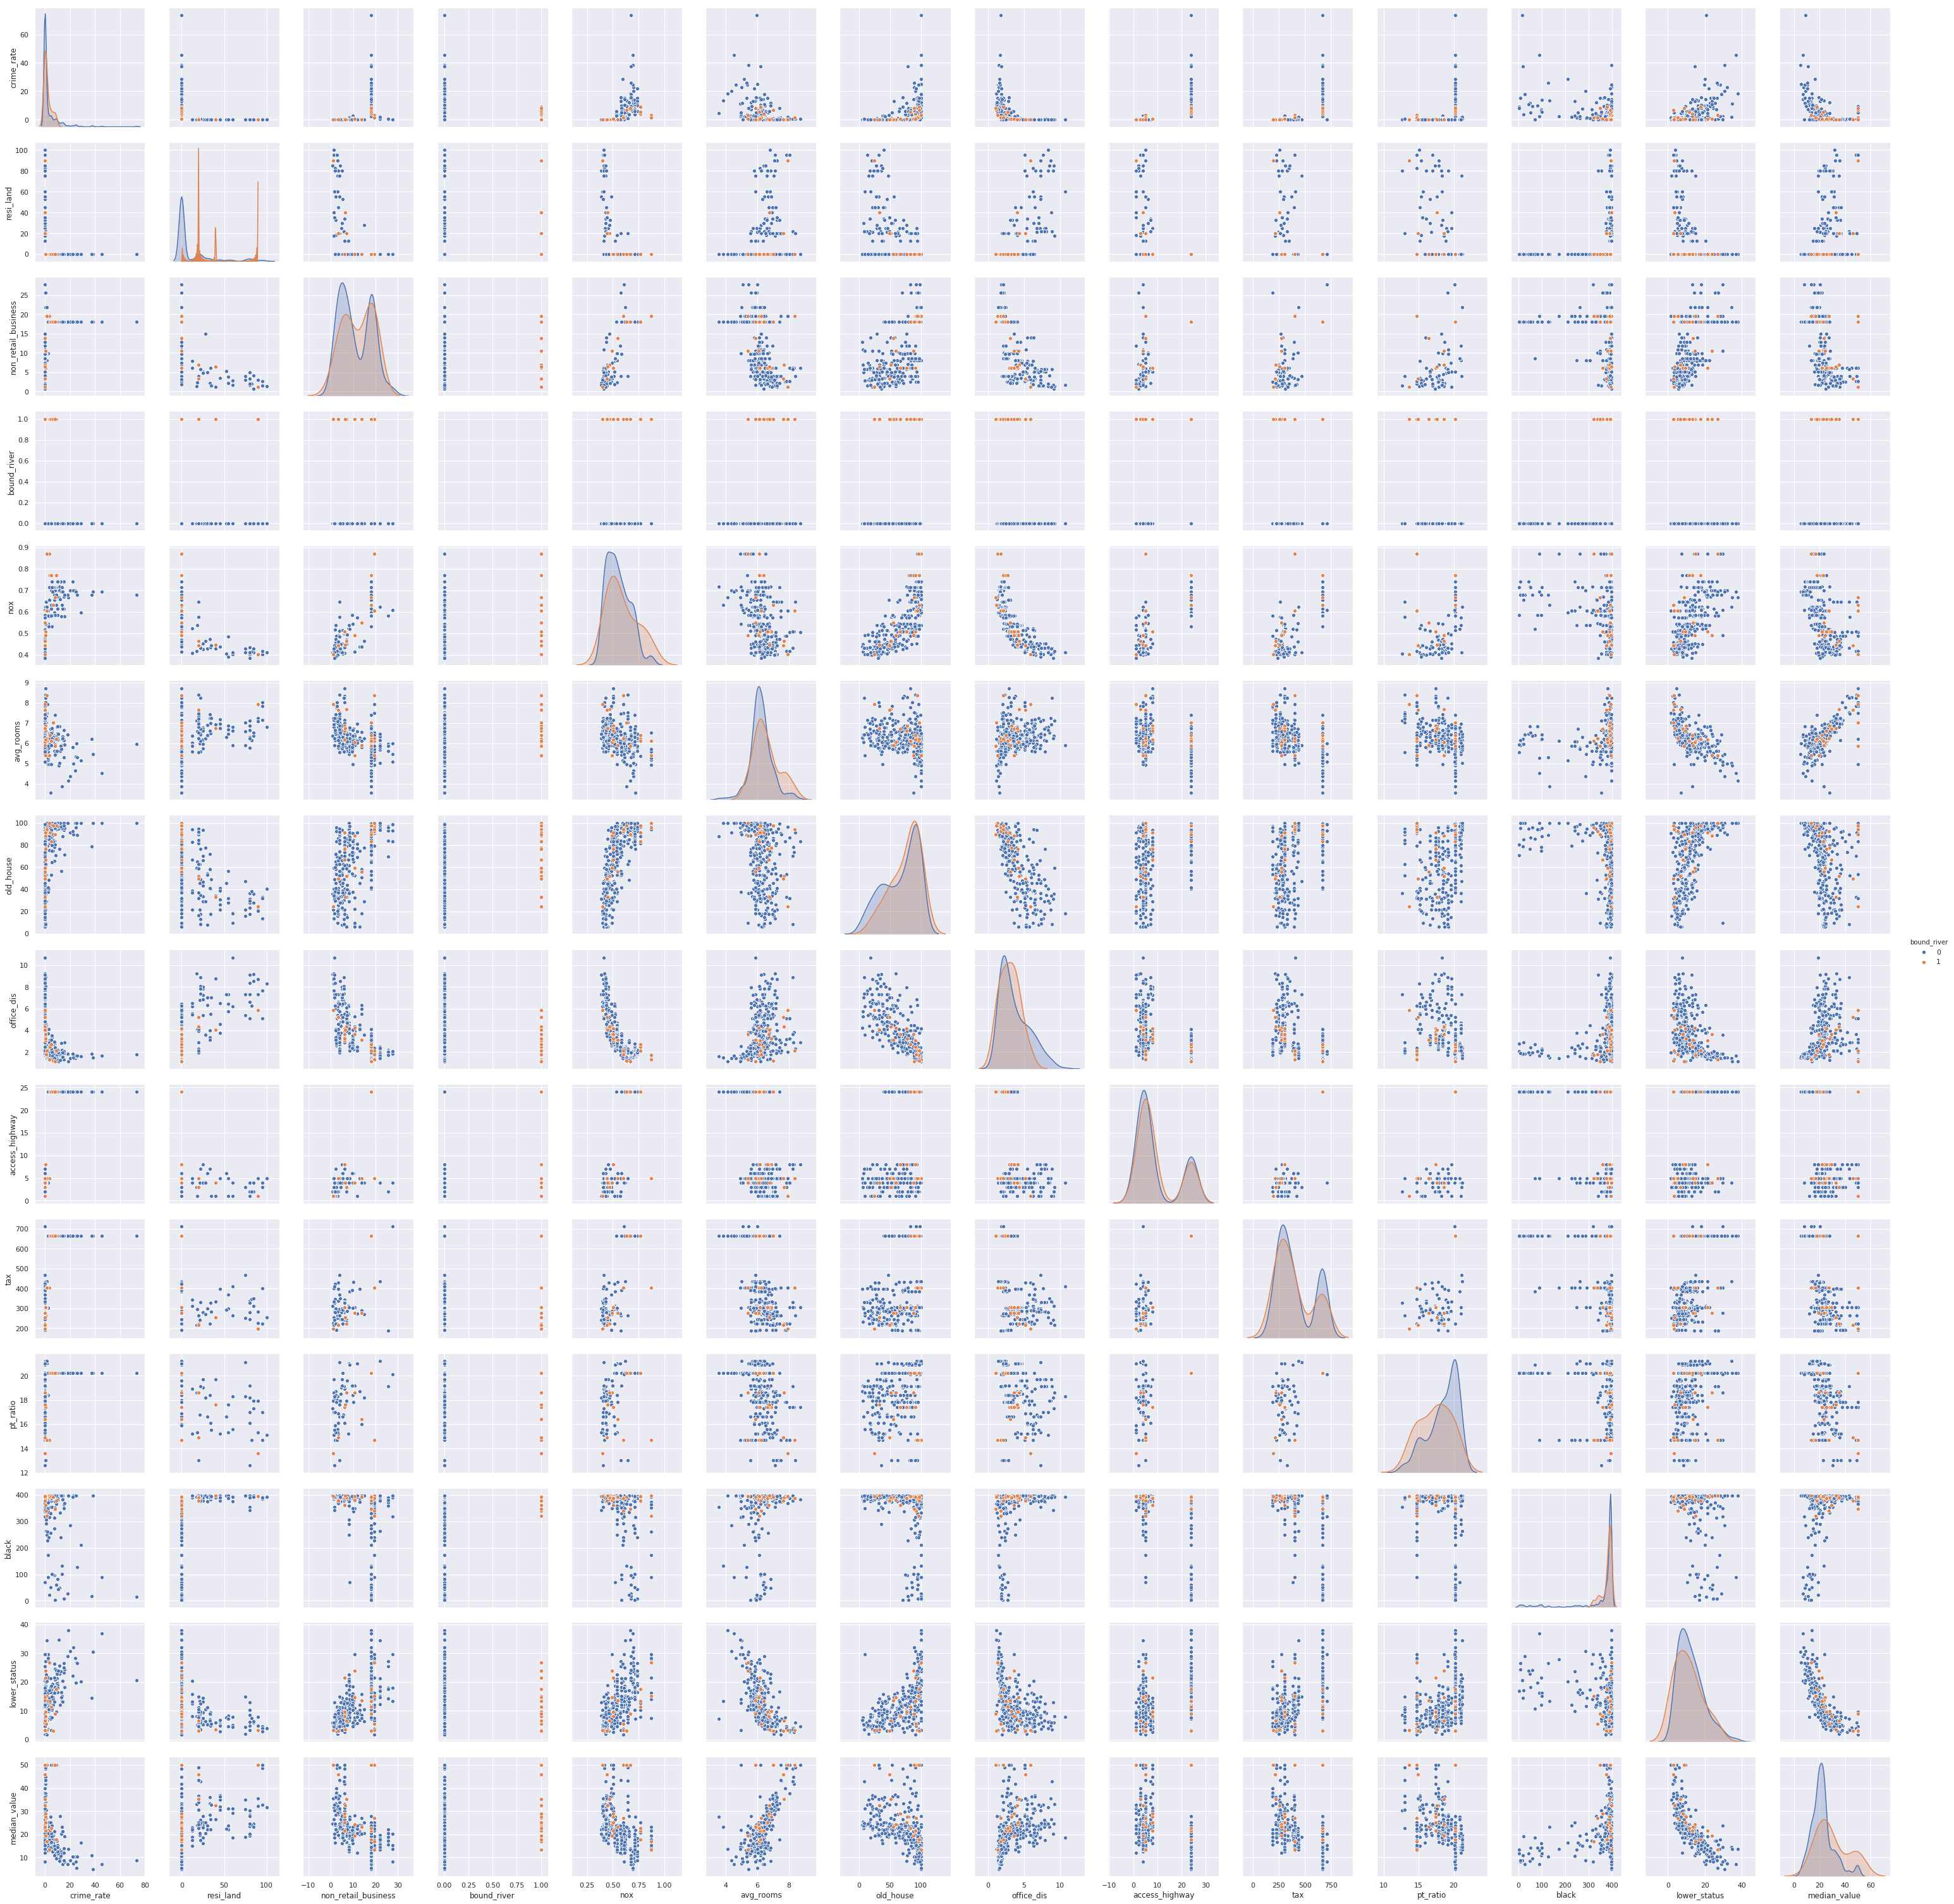

<Figure size 432x288 with 0 Axes>

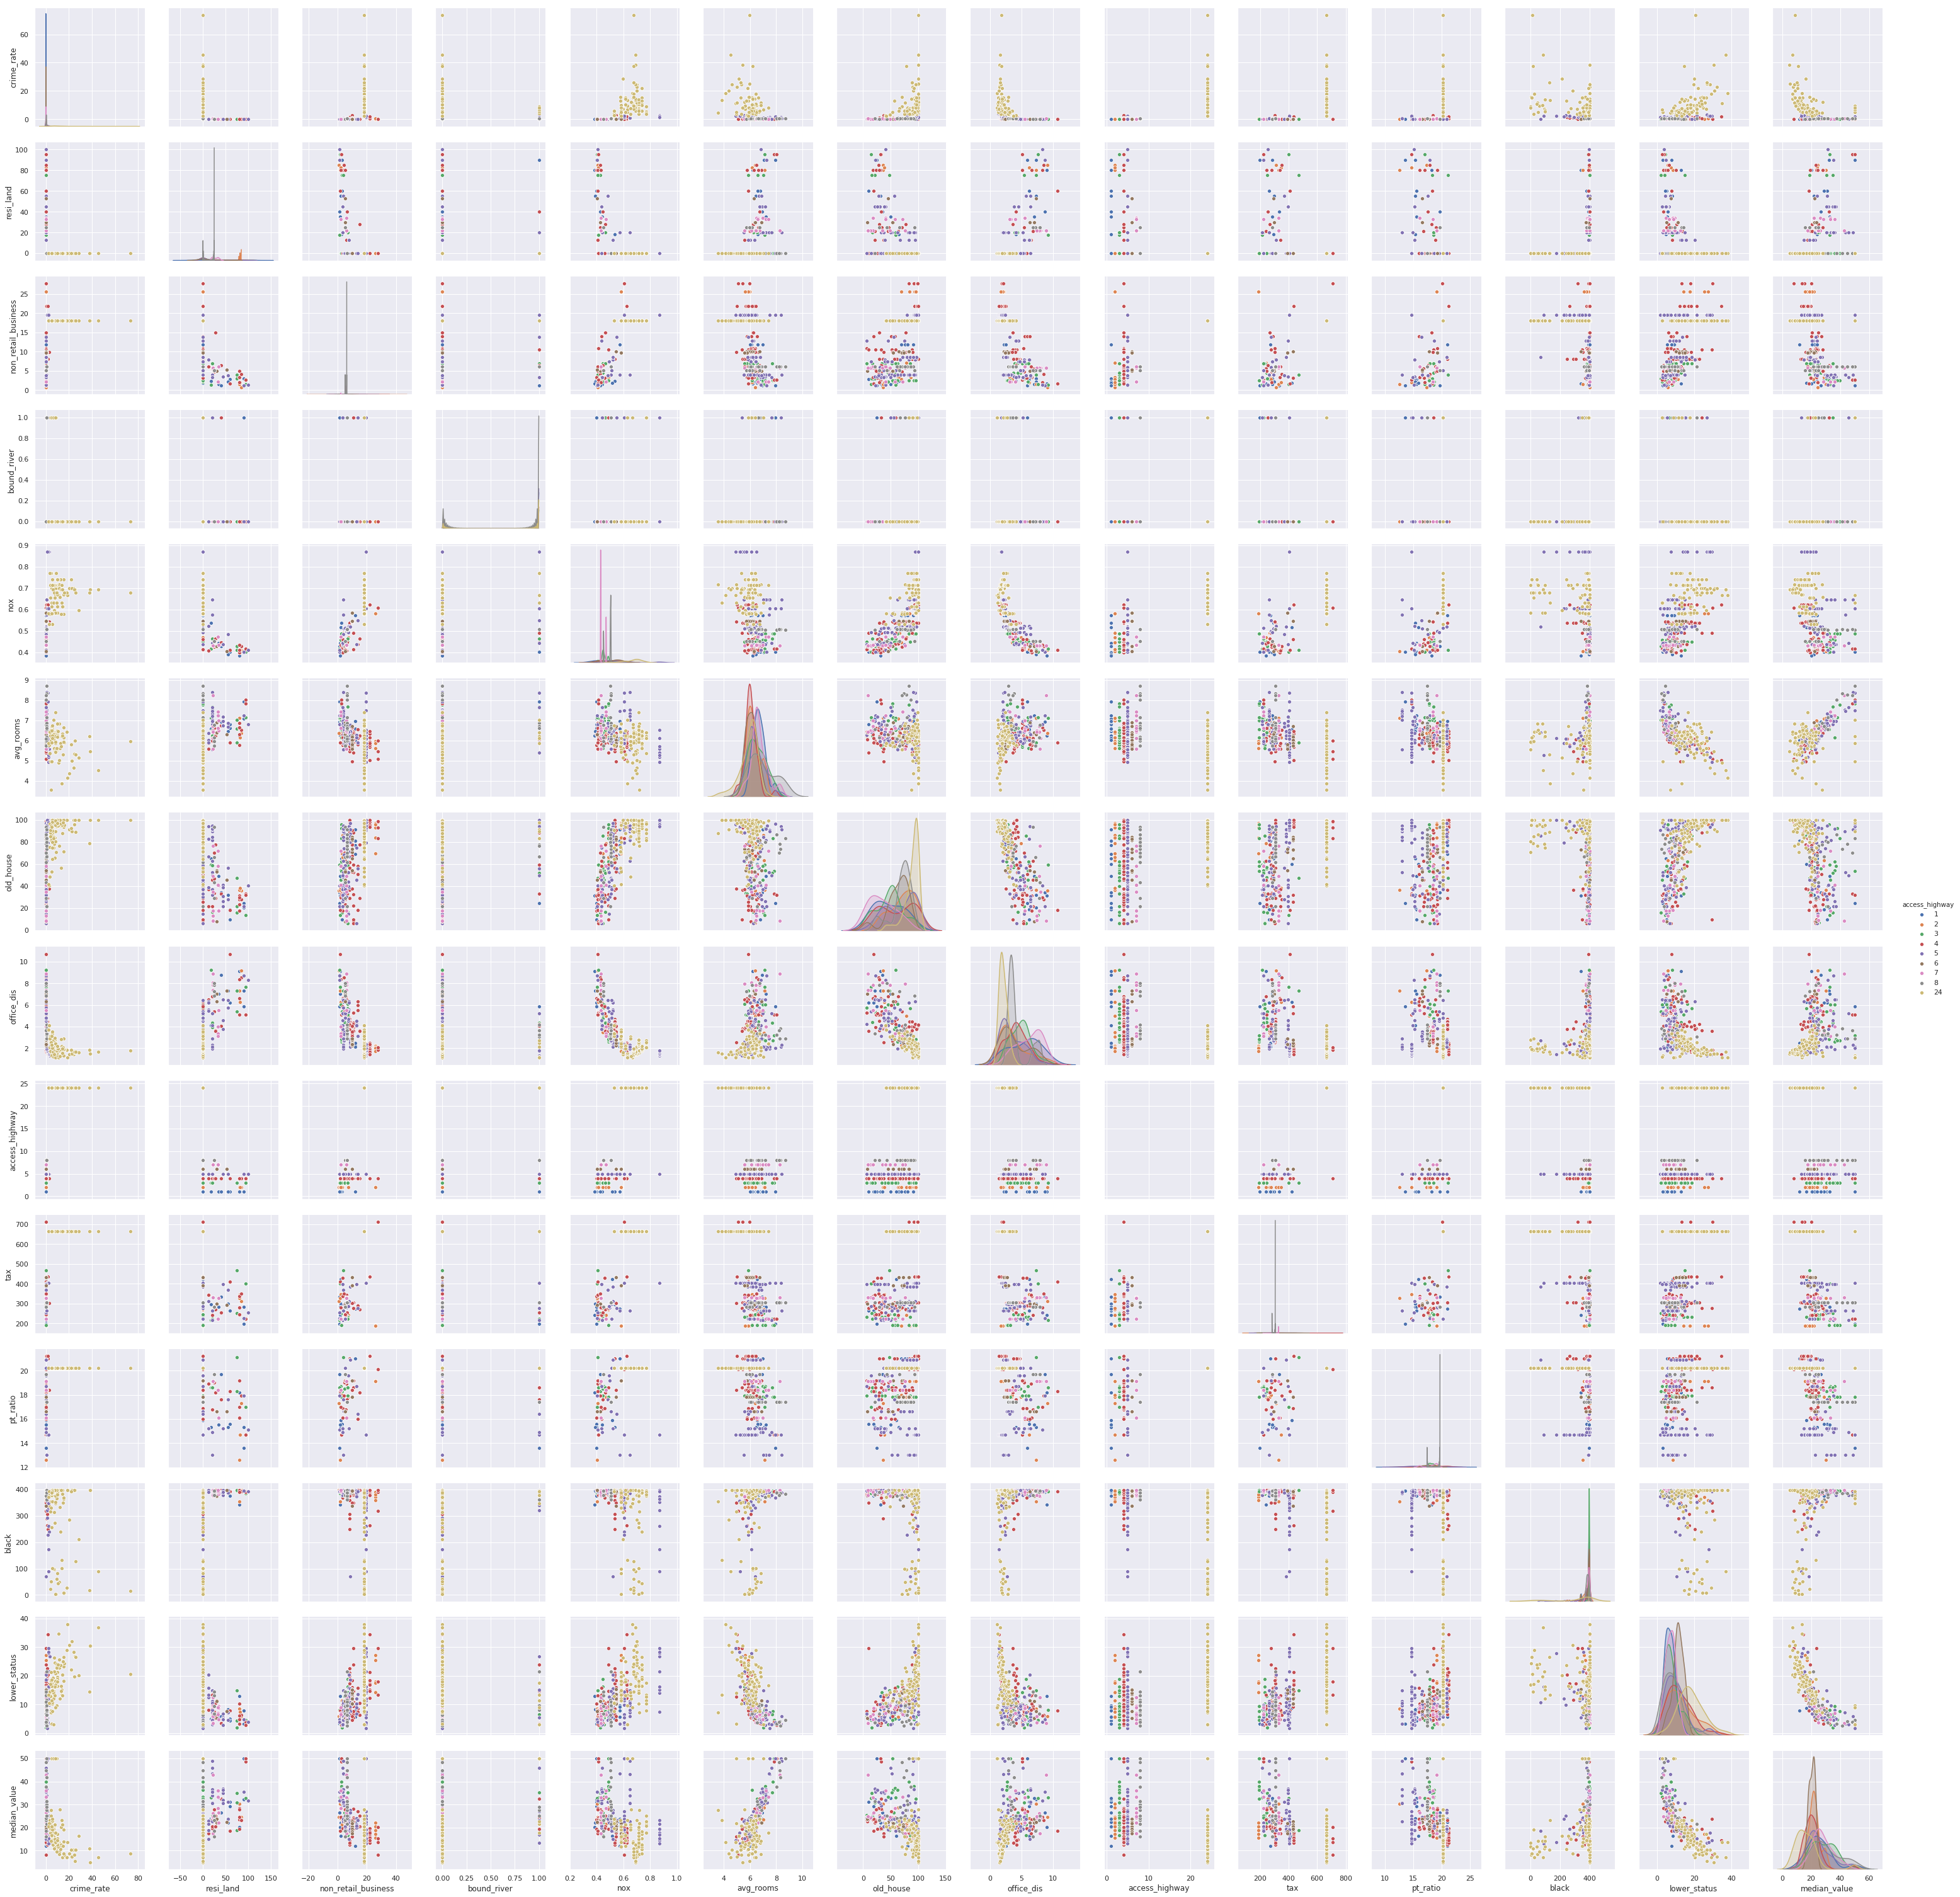

In [10]:
cat_cols = bool_cols + ord_cols

for col in cat_cols:
    sns.set()
    
    plt.figure()
    sns.pairplot(df, size=3.0, hue=col)
    plt.show()


### Inference of pair plots

#### With Bound River:
- Most are not bound by river.

#### With access highway
- most seem rad 24 => could make a new feature 


In [11]:
df.groupby('access_highway').count()

,crime_rate,resi_land,non_retail_business,bound_river,nox,avg_rooms,old_house,office_dis,tax,pt_ratio,black,lower_status,median_value
access_highway,,,,,,,,,,,,,
1,14,14,14,14,14,14,14,14,14,14,14,14,14
2,14,14,14,14,14,14,14,14,14,14,14,14,14
3,27,27,27,27,27,27,27,27,27,27,27,27,27
4,70,70,70,70,70,70,70,70,70,70,70,70,70
5,76,76,76,76,76,76,76,76,76,76,76,76,76
6,13,13,13,13,13,13,13,13,13,13,13,13,13
7,13,13,13,13,13,13,13,13,13,13,13,13,13
8,18,18,18,18,18,18,18,18,18,18,18,18,18
24,88,88,88,88,88,88,88,88,88,88,88,88,88


### Histograms to see distribution of feature values.

It is easier to model features with normal (or near normal) distributions with greater accuracy. Finding distribution of values of the features helps in the exploratory phase helps in deciding which features need to be scaled appropriately in the feature engineering phase.

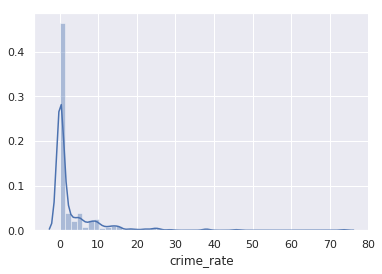

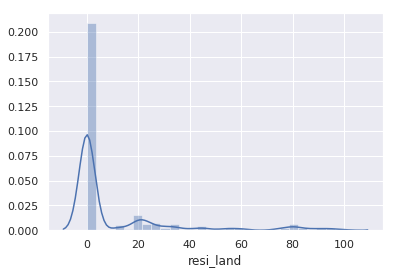

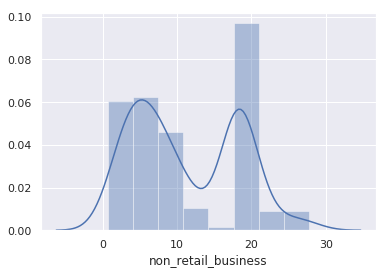

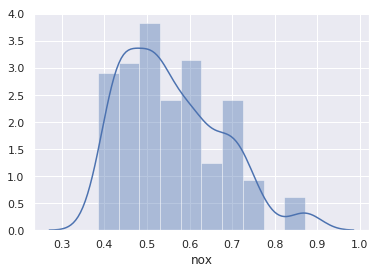

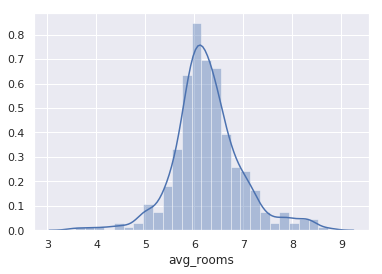

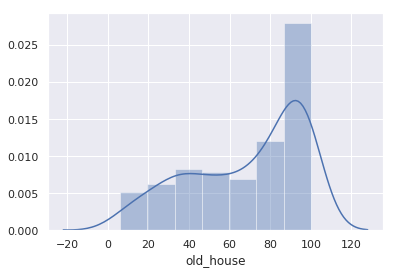

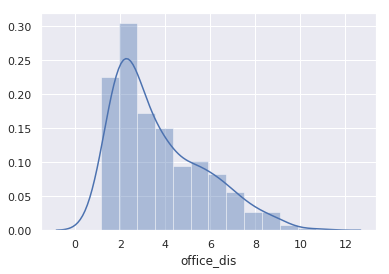

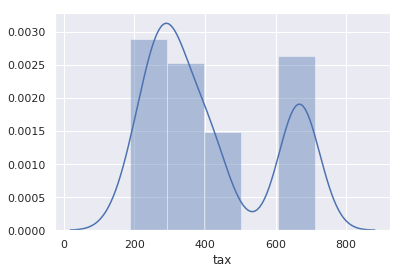

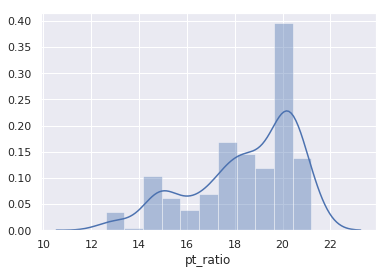

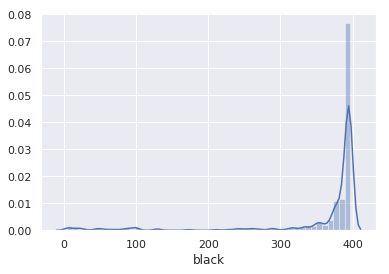

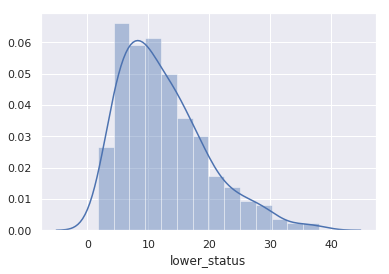

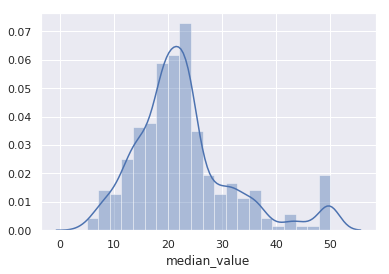

In [12]:
for col in num_cols:
    sns.set()
    
    plt.figure()
    
    sns.distplot(df[col])
    plt.show()

### Final Inferences (can be used in Feature Engineering)

- Median value seems negatively correlated with lower status of the population. (Lower status of population => lower the median value)
- Median value is positively correlated with avg rooms ==> avg rooms is an important feature.
- Lower status of population is highly correlated with other features like:
    - avg rooms : lower the status, lesser the rooms
    - nox : lower the status, higher the nitrogen oxide concentrations (pollution)
    - non retail business: lower the status, more non retail businesses in the locality.
- Avg rooms is almost uniformly distributed. Other features will have to be scaled.

Next post, we shall look at how to get more relevant features for modelling.

# Feature Selection

* Since avg roooms and lower status of population both are highly correlated with median value of houses, both of these are essential features. 

* Also, median value is uniformly distributed except a sudden spike around the value 50, we're going to call it an outlier and remove all rows with median value = 50.



In [21]:
df.loc[df['median_value'] == 50]  # 11 rows 

df = df.loc[df['median_value'] != 50]  # outlier rows discarded

df.head()

,crime_rate,resi_land,non_retail_business,bound_river,nox,avg_rooms,old_house,office_dis,access_highway,tax,pt_ratio,black,lower_status,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


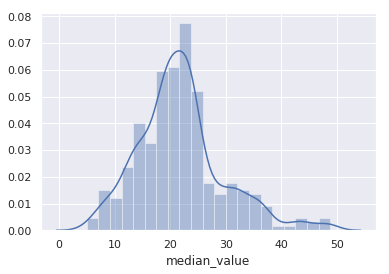

In [20]:
sns.distplot(df['median_value'])  # close to normal distribution

In [26]:
X = df[['avg_rooms','lower_status']]
y = df[['median_value']]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear Regression

In [27]:
# Linear Regresssion
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(xTrain, yTrain) #training the algorithm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
# for training data

y_pred = regressor.predict(xTrain)

from sklearn import metrics
print('For training data: \n')
print('Mean Absolute Error:', metrics.mean_absolute_error(yTrain, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yTrain, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTrain, y_pred)))

print('\nR2 Score: ', metrics.r2_score(yTrain, y_pred))

For training data: 

Mean Absolute Error: 3.3925923021427713
Mean Squared Error: 20.847455511287706
Root Mean Squared Error: 4.565901390885233

R2 Score:  0.6631033258060752


In [35]:
# for testing data
y_pred = regressor.predict(xTest)

from sklearn import metrics
print('For testing data: \n')
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yTest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, y_pred)))

print('\nR2 Score: ', metrics.r2_score(yTest, y_pred))

For testing data: 

Mean Absolute Error: 3.0481782302602634
Mean Squared Error: 16.632968340681646
Root Mean Squared Error: 4.078353631145986

R2 Score:  0.6798827730991679


# Polynomial Regression

In [42]:
X_train = xTrain
Y_train = yTrain
X_test = xTest
Y_test = yTest

from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  # Creates a polynomial regression model for the given degree
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, y_train_predicted))
  r2_train = metrics.r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict))
  r2_test = metrics.r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))


create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.471491542675329
R2 score of training set is 0.8052507063886819


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.205479344518173
R2 score of test set is 0.8022460119261077


In [71]:
# Submission on Kaggle

test = pd.read_csv('test.csv')
test_set = test[['rm','lstat']]

poly_features = PolynomialFeatures(degree=2)
  
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# predicting on training data-set
y_pred = poly_model.predict(poly_features.fit_transform(test_set))

data = []

for index, row in test.iterrows():
    data.append([int(row['ID']),y_pred[index][0]])
    

    
#submission = pd.DataFrame(data, columns = ['ID', 'medv'])

#submission.to_csv('submit.csv',index = None, header=True)

173
